In [1]:
import csv


def writecsv(csvfile,data):
    #Assuming res is a flat list
    with open(csvfile, "w") as output:
        writer = csv.writer(output,delimiter=' ', lineterminator='\n')
        writer.writerows(data)


# Referee 1
### Convert Cpoly to phi

0.9419809278192497


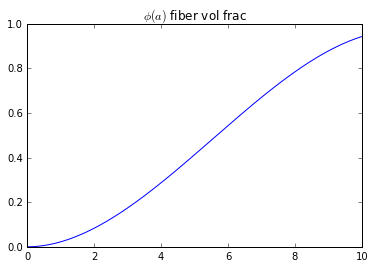

In [19]:
import math as ma
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
%matplotlib inline
#Vtricyl = lambda r: (16 - 8 * ma.sqrt(2)) * r**3
#Vbicyl = lambda r: 16 * r**3 / 3
Vcyl = lambda a, b: ma.pi*b*(a/2.)**2
#phi = lambda r: (3*Vcyl(r) - 3 * Vbicyl(r) + Vtricyl(r))  / 10**3
def phi(a,b=10): return (3*Vcyl(a,b) - 8 * ma.sqrt(2) * (a/2.)**3)/b**3

print(phi(10))

x = np.arange(0,10,0.01)
plt.plot(x,phi(x))
plt.title(r'$\phi(a)$ fiber vol frac')
plt.show()

0.0885909253582014


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


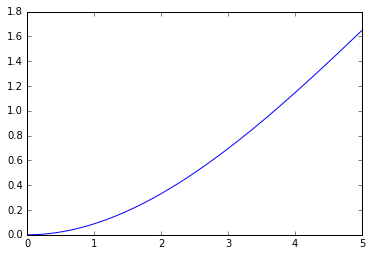

0.999999995927


In [3]:
def f(p,a,b=10):
    return (1 + p/a)**2 * phi(a,b)

print(f(1,1))

x = np.arange(0,10,0.01)
plt.plot(x/2,f(x/2,x/2))
plt.show()

#Johnson1996 steric factor formula 
def JohnsonSteric(p,a,b=10):
    return np.exp(-0.84 * f(p,a,b)**1.09)

def JohnsonStericPhi(phi,aop):
    return np.exp(-0.84 * (phi * (1+ 1./aop)**2)**1.09)


print(JohnsonSteric(0,0.001))

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


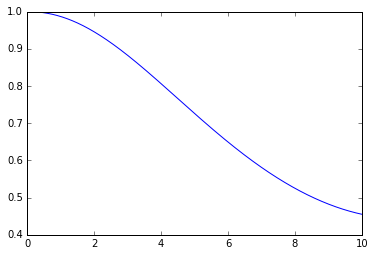

In [4]:

x = np.arange(0,10,0.01)
# aop = infty
plt.plot(x,JohnsonSteric(0,x))

### Functions for all heterogeneous hydrogel obstruction models

In [5]:
def alpha(p, a):
    return phi(a,b=1)*((a+p)/a)**2

def Ogston(p, a):
    return np.exp( -(a+p)/a * np.sqrt(phi(a,b=1)))

def Johansson(p, a):
    return np.exp(-0.84 * alpha( p, a)**1.09)

def Tsai(p, a):
    return (1 + 2/3 *alpha(p, a))**-1

# The problem with Amsden, is that in paper 3 suggested by the ref 1, amsden says it's for heterogenous hydrogels
# But in the paper where he actually introduces the formule, it says for homogeneous hydrogels (Amsden1999)
def Amsden(phi, p, a):
    return 0#np.exp(- np.pi * ((a+p)/**2)
# Justify like this in the paper. Also, we already include two other D/D0 = exp(...) models, which obviously dont
# agree with linear decrease.

Ogston


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


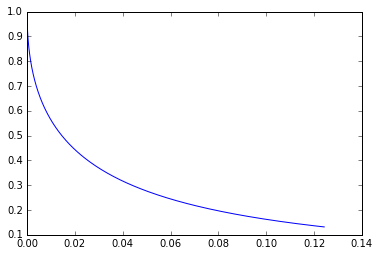

In [6]:
# For Alexa in Dextran values in nanometers
pexp = 1.9
aexp = 0.4
bexp = 23
aop = aexp/pexp

print(Ogston.__name__)
avals = np.arange(0,0.25,0.001)
phivals = phi(avals,b=1)
#alpha(0.1,0.1)
plt.plot(phivals, Ogston(avals/aop , avals))
plt.show()

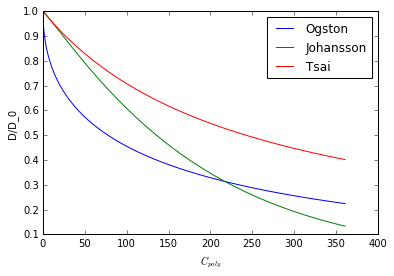

In [7]:
def Cpoly(a,aexp=0.4,m_a=162*1.66):
    "m_a is the monomer weight, a the monomer diameter in relative units"
    Vmonomer_exp = Vcyl(aexp,aexp)
    # nmonomerPerCell = Vpolymer/Vmonomer with phi = Vpolymer/Vcell
    return m_a * phi(a,b=1) / Vmonomer_exp
atest=0.05


def plotIt(dd0functions,p,a ):
    "This function takes the relative particle and polymer size p and a!"
    pexp = 1.9
    aexp = 0.4
    bexp = 23
    aop = aexp/pexp
    avals = np.arange(0.0001,0.18,0.001)
    Cvals = Cpoly(avals)
    toFile = [Cvals]
    for f in dd0functions:
        #plt.plot(phivals, f(avals/aop , avals),label=f.__name__)
        dd0vals =  f(avals/aop , avals)
        plt.plot(Cvals,dd0vals,label=f.__name__)
        toFile.append(dd0vals)
        #print(toFile,'++++++++++++++++++++++++++')
    plt.xlabel(r'$C_{poly}$')
    #plt.xlabel(r'$\phi$')
    plt.ylabel(r'D/D_0')
    plt.legend()
    plt.show()
    writecsv('diffmodels.csv',np.asarray(toFile).T)
    
functions=[Ogston,Johansson,Tsai]
plotIt(functions,1,1)

In [8]:
# print plot data to file
dd0ogston = Ogston(avals/aop , avals)
avals = np.arange(0,0.18,0.001)


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


## Calculate U0 from surface charge and size
According to Deen and Johnson (1996) -- Johnson1996

dextran charge density: 2.03934235198 
alexa charge density: -0.028254631559206066


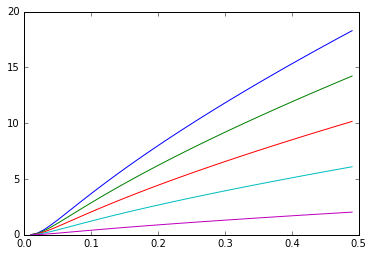

charge distance along Dex in nm: 1.56972253098


2.5484764542936293

In [9]:
# a       - 2 * polyrad
# p       - 2 * pradius
# k       - Debyle length == range k
# c_p     - nondimensional tracer surface charge
# c_a     - nondimensional cylinder surface charge
# c_p = q_p * p/2 * F / eps / R / T 
# c_a = q_a * p/2 * F / eps / R / T 
# q_p     - dimensional surface charge density of sphere.
# q_a     - ... of polymer
# eps     - dielectric permittivity eps = eps_r * eps_0 = 80.1 * 8.8542 *10^-12 C * (V * m)^-1
eps = 78.1 * 8.8542 *10**(-12)
# e       - elementary charge 1.6022×10−19 C
e = 1.6022 * 10**(-19)
# F       - Faraday's constant
# R       - Gas constant
# T       - Temperature 
T = 25 + 273.15
k_B = 1.381e-23
# Does this make sense unit wise? Or do I get 1/(kT)^2 ?
''' The energy needed in [4] is obtained by multiplying DG by the ratio of the electrostatic and thermal energy scales:
     E = (RT/F)^2 eps a/2 /(kT) deltaG
     (Johnson1996)'''

a = 1
p = 1
k = 1
c_p = 1
c_a = 1
#print(getU0(a,p,k,c_p,c_a))

def getU0fromcharge(a,p,k,q_p,q_a):
    return  1/(k_B*T) * 2.4 * (p/2 /k)**0.76 * (a/p)**1.25  * q_a * q_p / eps * (p/2)**3 *  np.exp((a + p)/(2*k))
# Now, the units make sense.

def getchargefromU0(a,p,k,U_0):
    #q_pxq_a = U_0 /(1/(k_B*T) * 2.4 /k * a/2   / eps * (p/2)**3 ) * np.exp(-(a + p)/(2*k))
    q_pxq_a = U_0 / getU0fromcharge(a,p,k,q_p=1,q_a=1)
    return q_pxq_a

# surface charge of alexa488
r_alexa = 1.9 / 2 * 1e-9
q_alexa = -2 * e / (4 * np.pi * r_alexa**2)
# surface charge of dextran
r_dextran = 0.4 / 2 * 1e-9
# q_dextran = ? 
# Do we have info on this ?
b_exp = 23 * 1e-9

def q_dextran(k,U_0): 
    # This function takes relative values for U_0 and k !!!
    return getchargefromU0(2*r_dextran,2*r_alexa, k *b_exp , U_0 )/ q_alexa

print('dextran charge density:',q_dextran(0.1,-5),'\nalexa charge density:',q_alexa)
krel = np.arange(0.01,.5,0.01)
for u in range(-9,0,2):
    plt.plot(krel,q_dextran(krel, u))
plt.show()

# Calculate charges along dextran backbone
# Cylinder surface A_cyl = 2 *pi * r* h
def dDexCharge(k,U_0):
    # h for abs(q_dextran * A_cyl(h)) = e
    return e / abs((q_dextran(k,U_0) * 2 * r_dextran * np.pi))

print('charge distance along Dex in nm:',dDexCharge(0.02,-5)*1e9)

Acyl = lambda r,h : 2 * np.pi * r * h
Asph = lambda r:    4 * np.pi * r**2

Acyl(r_dextran,b_exp)/Asph(r_alexa)

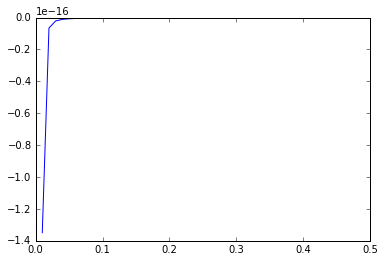

In [10]:
# Dextran(-) has approximately one negative charge per five glucoses, whereas 
# dextran(+) has approximately one amine group per three glucoses
def getU0Jason(k):
    q_dextranplus = e / Acyl(0.2, 3*0.4)
    return getU0fromcharge(2*r_dextran,2*r_alexa,k * b_exp,q_alexa,q_dextranplus)
ks = np.arange(0.01,.5,0.01)
plt.plot(ks,getU0Jason(ks))

## Ref 1 - Calculate U_0 with Rolands equation
Roland calculated in 1999 - Macromolecules, 32 - the surface potential of a charged cylinder in the presence of another point charge (in units of $k_B T$) is
\begin{equation}
  U_c(r = r_c) = 2 l_B \tau K_0(\kappa r_c) I_0(\kappa r_c)
\end{equation}
the limiting behavior is
$$U_c \approx l_b \tau / (\kappa r_c) \quad \text{ for } \quad r_c << k$$
$$U_c \approx -2 l_b \tau \ln(\kappa r_c) \quad \text{ for } \quad r_c >> k$$
Here, $\tau$ is the line charge density, $r_c$ the cylinder radius, $\kappa = k^{-1}$ and $l_B = e^2/4\pi\epsilon k_BT$ the Bjerrum length.



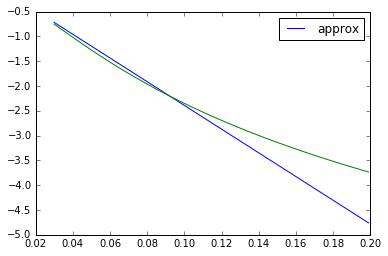

In [63]:
l_B = e**2 / (4  *np.pi * eps * k_B * T)
tau_dexp = 1 / (1.2e-9) # line charge density of dextran(+). one charge per 3 glucoses of diameter 0.4nm
kT = k_B * T
ne_alexa = -2 #number of elem charges on alexa488 molecule

def UcApprox(r_c,k,tau):
    return ne_alexa * l_B * tau / ( r_c/k)

K0 = lambda x: sps.kn(0,x)
I0 = lambda x: sps.iv(0,x)
def UcBessel(r_c,k):
    return ne_alexa * 2 * l_B * tau_dexp * K0(r_c/k) * I0(r_c/k)

ks = np.arange(0.03,0.2,0.001)
p_exp = r_dextran + r_alexa
plt.plot(ks,UcApprox(p_exp,ks*b_exp ,tau_dexp),label='approx')
plt.plot(ks,UcBessel(p_exp,ks*b_exp ))
plt.legend()
plt.show()

With this potential we can calculate the electrostatic potential on the surface of the polymer chain.

The exponential interaction potential in the simulation $U(r)=U_0 \exp(-r/k)$ depends on the center-to-center distance, but the smalles possible $r$ value is $r=p/2$, due to steric hindrance, where we assume that $a=0$, i.e. $p$ incorporates the polymer width AND the particle diameter.
Hence, we can relate $U(r=p/2) = U_c(r_c = p/2)$, where, for $U_c$, we simply assume that the width of the cylinder is $p$, using the same argument as before.

We obtain:
$$U_0 = U_c(p/2) \, \exp(p/(2k)) $$

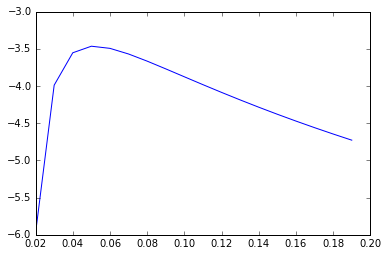

In [65]:
def U0_DH(p,k):
    return UcBessel(p/2,k) * np.exp(p/(2*k))
ks = np.arange(0.02,0.2,0.01)
plt.plot(ks,U0_DH(0.1,ks))

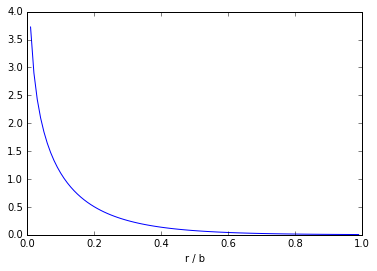

11.6288569809


In [55]:

def lineCharge(r,k):
    return K0(r/k) * 2 * l_B * tau_dexp

rs  = np.arange(0.01,1,0.01)
plt.plot(rs,lineCharge(rs,0.2))
plt.xlabel('r / b')
plt.show()

# I can assume that the prefactor 


### Test Debye-Hueckel

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


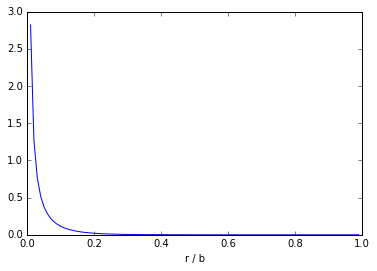

In [47]:
def DH(r,k):
    return l_B * np.exp(-r/k)/ (r*b_exp)
rs = np.arange(0,1,0.01)
plt.plot(rs,DH(rs,0.1))
plt.xlabel('r / b')



--------------------------------------------------------------------------------------------
----------------


# Referee 3
--------------------------------------------------------------------------------------------------
-------------
### Obtaining anomalous diffusion exponent

In [9]:
import numpy as np
from scipy import stats
import sys

def readData(datafile):
    file = open(datafile,'r')
    all_lines = file.readlines()
    i=0
    n=0
    new_data = []
    for i in range(len(all_lines[::1])):
        new_data.append([float(x) for x in all_lines[i].split()])
    file.close()
    return new_data


def getAlphaHere(dataArr):
    "Fit msd array to obtain exponent alpha"
    points = len(dataArr)
    fitArr = np.asarray(dataArr)
    x = np.log(fitArr[:,0])
    y = np.log(fitArr[:,1])
    alpha, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return alpha, std_err

#data = readData('EPJE/squaredispS.dat')

tarr = np.arange(5,195,10)
alph=[]
if False:
    for i in tarr:
        subarray = data[i-5:i+5]
        alph.append(getAlphaHere(subarray)) 
    #print(alph)
    
def fitlocalMSD(data,fitstart=0.002):
    # fit MSD/b^2 values in 0.002 < t < 200
    fitinterval = [fitstart,200]
    texponents = np.arange(np.log10(fitinterval[0]),np.log10(fitinterval[1]),0.1)
    alphas = []
    for i in texponents[0:]:
        t = 10**i
        submsd = [msd for msd in data if np.abs(np.log10(msd[0]/t)) < 0.15]
        a, err = getAlphaHere(submsd)
        alphas.append([t,a,err])
    return np.asarray(alphas)

#alphas = fitlocalMSD(dataL)
#print(alphas)

In [5]:
#reading Data
path='EPJE/k1.000/'
dataL = readData('EPJE/squaredispL.dat')
datap5 = readData('EPJE/u5/InstantValues/squaredisp.dat')
datam5 = readData('EPJE/u-5/InstantValues/squaredisp.dat')
datap1 = readData('EPJE/u1/InstantValues/squaredisp.dat')
# Long data
datap5L = readData(path + 'u5/InstantValues/squaredisp.dat')
datam5L = readData(path + 'u-5/InstantValues/squaredisp.dat')
datap1L = readData(path + 'u1/InstantValues/squaredisp.dat')
datam1L = readData(path + 'u-1/InstantValues/squaredisp.dat')

In [6]:
alphasp5 = fitlocalMSD(datap5)
alphasm5 = fitlocalMSD(datam5)
alphasp1 = fitlocalMSD(datap1)

/usr/lib/python3.5/site-packages/scipy/stats/stats.py:3175: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/lib/python3.5/site-packages/scipy/stats/stats.py:3177: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/lib/python3.5/site-packages/scipy/stats/stats.py:3179: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [10]:
alphasp5L = fitlocalMSD(datap5L,0.001)
alphasm5L = fitlocalMSD(datam5L,0.001)
#alphasp1L = fitlocalMSD(datap1L)
alphasm1L = fitlocalMSD(datam1L,0.001)

/usr/lib/python3.5/site-packages/scipy/stats/stats.py:3175: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/lib/python3.5/site-packages/scipy/stats/stats.py:3177: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/lib/python3.5/site-packages/scipy/stats/stats.py:3179: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/usr/lib/python3.5/site-packages/scipy/stats/stats.py:3179: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


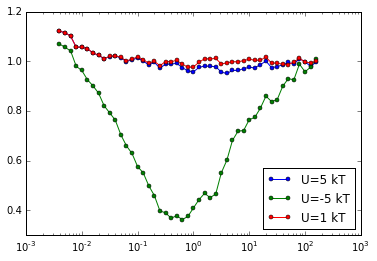

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
lines = [(alphasp5,'U=5 kT'),(alphasm5,'U=-5 kT'),(alphasp1,'U=1 kT')]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale('log')
for line, name in lines:
    t = line[:,0]
    a = line[:,1]
    #aerr = line[:,2]
    plt.plot(t,a,'o-',label=name,ms=4)
plt.legend(loc='lower right')
plt.show()
#print(alphas)

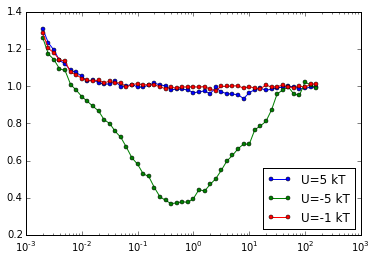

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
lines = [(alphasp5L,'U=5 kT'),(alphasm5L,'U=-5 kT'),(alphasm1L,'U=-1 kT')]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale('log')
for line, name in lines:
    t = line[:,0]
    a = line[:,1]
    #aerr = line[:,2]
    plt.plot(t,a,'o-',label=name,ms=4)
plt.legend(loc='lower right')
plt.show()
#print(alphas)

In [8]:
writecsv('alphasp5.csv',alphasp5)
writecsv('alphasm5.csv',alphasm5)
writecsv('alphasp1.csv',alphasp1)

In [138]:
writecsv('alphasp5L.csv',alphasp5L)
writecsv('alphasm5L.csv',alphasm5L)
writecsv('alphasp1L.csv',alphasp1)

In [139]:
np.amin(alphasm5L[:,1])

0.36836522061126287